In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# for the transcript file, we want it in the form of transcripts.tsv.gz
# with the following columns: X, Y, gene, Count
df = pd.read_csv('TOUCHSTONE_STJ_CR_FFPE_PANC_A1_WCM_N_R1_tx.csv')
print(df['fov'].unique())
# scale is 1 pixel = 0.12028 um which is 8.31393 pixels = 1 um
# scale_factor = 8.31393

# only going to look at fov 1 for convenience's sake
# we can filter by z if we want to filter by stack
df = df[df['fov'] == 38][['x_global_px', 'y_global_px','target']]
# df = df[['x_global_px', 'y_global_px','target']]
df.columns=['X', 'Y', 'gene']

# remove the Control and Negative genes
df = df[~df['gene'].str.contains('Control')]
df = df[~df['gene'].str.contains('Negative')]

df = df.groupby(['X', 'Y', 'gene']).size().reset_index(name='Count')
df.sort_values(by='Y', inplace=True)
# df['X'] = df['X']*scale_factor
# df['Y'] = df['Y']*scale_factor
df['Count']=1
print(df)
df.to_csv('transcripts.tsv.gz', sep='\t', compression='gzip', index=False)

[  1   2   3   4  15  16  17  18  19  33  34  35  36  37  38  39  55  56
  57  58  59  60  61  62  78  79  80  81  82  83  84 100 101 102 103 104
 105 119 120 121 122 123]
                   X              Y     gene  Count
168544  26549.999536  119185.090097    REG1A      1
231288  26937.000515  119185.090097     PFN1      1
245477  27053.998736  119185.090097    HMGN2      1
321514  27596.999325  119185.090097   STAT5B      1
478591  29400.999905  119185.090097    REG1A      1
...              ...            ...      ...    ...
65100   25951.999377  123417.093665    REG1A      1
400437  28402.000607  123417.093665     FASN      1
407189  28491.000525  123417.093665    ATG10      1
162496  26515.000170  123417.093665   SPINK1      1
109260  26210.000029  123417.093665  ATP5F1E      1

[505284 rows x 4 columns]


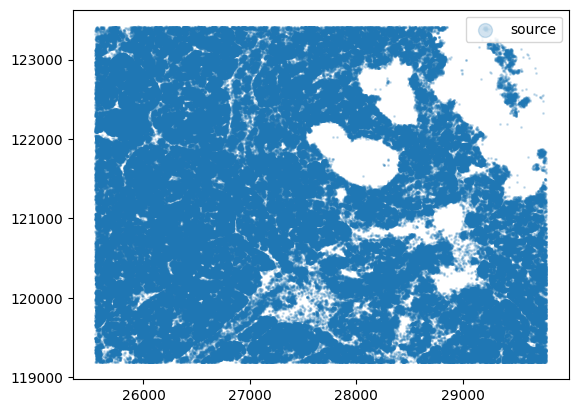

In [10]:
# get cell centroid coordinates
xI = np.array(df['X'])
yI = np.array(df['Y'])

# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2, label='source')
ax.legend(markerscale = 10)

In [11]:
# for the features file we want it in the form of feature.clean.tsv.gz
# we want a list of genes called gene and the counts called Count
df_feature = df.drop(['X', 'Y'], axis=1).copy()
df_feature = df_feature.groupby('gene')['Count'].sum().reset_index()
df_feature.to_csv('feature.clean.tsv.gz', sep='\t', compression='gzip', index=False)

In [12]:
# create a coordinate_minmax.tsv file
# that contains xmin, xmax, ymin, ymax
xmin = df['X'].min()
xmax = df['X'].max()
ymin = df['Y'].min()
ymax = df['Y'].max()

coordinate_minmax = {'xmin': [xmin], 'xmax': [xmax], 'ymin': [ymin], 'ymax': [ymax]}
df_minmax = pd.DataFrame(coordinate_minmax).transpose()
print(df_minmax)
df_minmax.to_csv('coordinate_minmax.tsv', sep='\t', index=True, header=False)

                  0
xmin   25545.999196
xmax   29780.999821
ymin  119185.090097
ymax  123417.093665
